/Users/yanjun/Documents/apps/miniconda3/envs/dd2421/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 128)            │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 150)            │         4,950 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,566 (64.71 KB)

 Trainable params: 16,182 (63.21 KB)

 Non-trainable params: 384 (1.50 KB)

Epoch 1/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step - loss: 1.2057 - mae: 0.9181

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step - loss: 1.2057 - mae: 0.9181 - val_loss: 1.4249 - val_mae: 1.0744 - learning_rate: 0.0010
Epoch 2/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1.1404 - mae: 0.8864 - val_loss: 1.4249 - val_mae: 1.0745 - learning_rate: 0.0010
Epoch 3/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 1.1375 - mae: 0.8726 - val_loss: 1.4256 - val_mae: 1.0748 - learning_rate: 0.0010
Epoch 4/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 1.0864 - mae: 0.8640 - val_loss: 1.4260 - val_mae: 1.0751 - learning_rate: 0.0010
Epoch 5/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 1.0676 - mae: 0.8682 - val_loss: 1.4265 - val_mae: 1.0753 - learning_rate: 0.0010
Epoch 6/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 1.0753 - mae: 0.8591 - val_loss: 1.4267 - val_mae: 1.0754 - learning_rate: 0.0010
Epoch 7/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 1.0498 - mae: 0.8579 - val_loss: 1.4266 - val_mae: 1.0754 - learning_rate: 0.0010
Epoch 8/300
1/1 ━━━━━━━━━━━━━━━

/Users/yanjun/Documents/apps/miniconda3/envs/dd2421/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 14 variables whereas the saved optimizer has 26 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


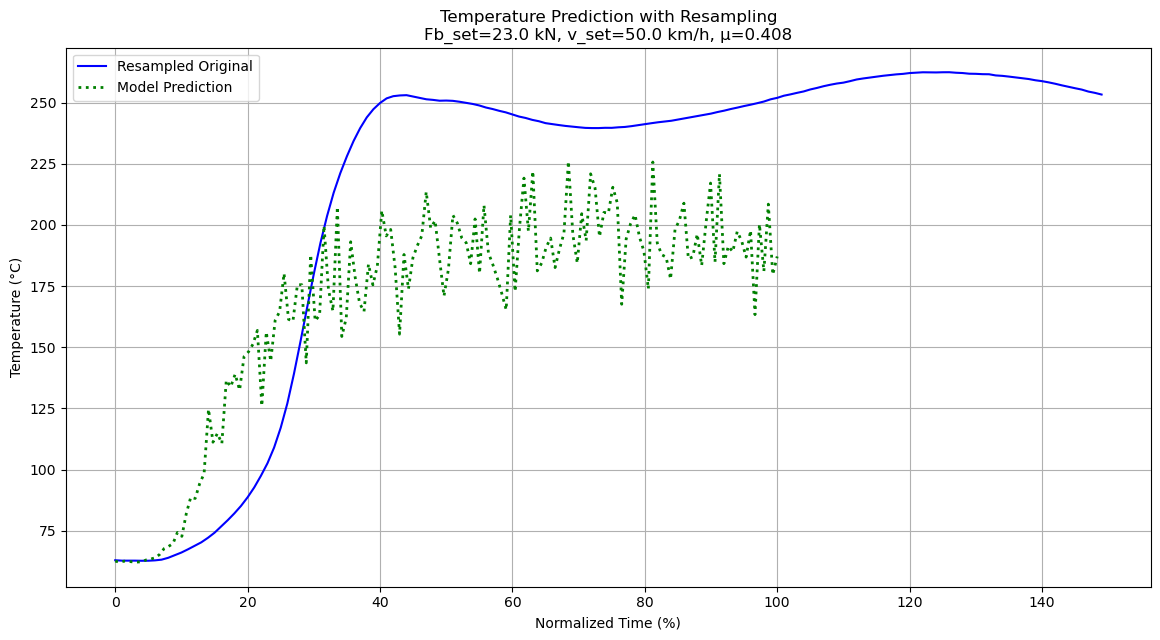

In [3]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping, ModelCheckpoint
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import joblib

# 1. Data Loading and Resampling
def load_and_resample_data(target_length=100):
    """Load data and resample all series to target length using interpolation"""
    summary_df = pd.read_csv('all.csv')
    test_data = []
    
    for i in range(1, 26):
        try:
            filename = f'csv_ave/{i}_ave.csv'
            df = pd.read_csv(filename, header=1)
            test_params = summary_df.iloc[i-1][['Fb_set\n[kN]', 'v_set\n[km/h]', 'μ_m']].values
            temperature_series = df.iloc[:, 3].values  # Assuming temperature is in column 3
            
            # Create interpolation function
            original_length = len(temperature_series)
            x_original = np.linspace(0, 1, original_length)
            x_target = np.linspace(0, 1, target_length)
            
            # Linear interpolation
            interpolator = interp1d(x_original, temperature_series, 
                                  kind='linear', 
                                  fill_value='extrapolate')
            resampled_series = interpolator(x_target)
            
            test_data.append({
                'Fb_set': test_params[0],
                'v_set': test_params[1],
                'μ_m': test_params[2],
                'temperature_series': resampled_series
            })
        except FileNotFoundError:
            continue
    
    return test_data, target_length

# Load and resample data to consistent length
test_data, series_length = load_and_resample_data(target_length=150)  # You can adjust target_length

# Prepare data arrays
X = np.array([[d['Fb_set'], d['v_set'], d['μ_m']] for d in test_data])
y = np.array([d['temperature_series'] for d in test_data])

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Normalize features
scaler_X = StandardScaler()
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

# Normalize targets (per time step)
scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train)
y_test = scaler_y.transform(y_test)

# 2. Enhanced Model Architecture
def build_resampling_model(input_shape, output_length):
    model = keras.Sequential([
        layers.Dense(128, activation='relu', input_shape=input_shape),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        layers.Dense(64, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.2),
        layers.Dense(32, activation='relu'),
        layers.Dense(output_length)
    ])
    
    optimizer = keras.optimizers.Adam(learning_rate=0.001)
    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae'])
    return model

model = build_resampling_model((X_train.shape[1],), series_length)
model.summary()

# 3. Training with Callbacks
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=25,
    restore_best_weights=True)

checkpoint = ModelCheckpoint(
    'best_resampling_model.h5',
    monitor='val_loss',
    save_best_only=True,
    mode='min')

reduce_lr = keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=10,
    min_lr=1e-6)

# 4. Train the Model
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=300,
    batch_size=16,
    callbacks=[early_stopping, checkpoint, reduce_lr],
    verbose=1)

# 5. Model Evaluation
print("\nEvaluating on test data:")
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Test MSE: {test_loss:.4f}, Test MAE: {test_mae:.4f}")

# Save the model and scalers
model.save('brake_temp_resampling_model.keras')
joblib.dump(scaler_X, 'scaler_X_resampling.pkl')
joblib.dump(scaler_y, 'scaler_y_resampling.pkl')

# 6. Prediction with Resampling
def predict_temperature_with_resampling(Fb_set, v_set, mu_m, original_length=None):
    """Predict temperature series and optionally resample back to original length"""
    # Load model and scalers
    model = keras.models.load_model('brake_temp_resampling_model.keras')
    scaler_X = joblib.load('scaler_X_resampling.pkl')
    scaler_y = joblib.load('scaler_y_resampling.pkl')
    
    # Prepare input
    input_data = np.array([[Fb_set, v_set, mu_m]])
    input_data = scaler_X.transform(input_data)
    
    # Predict
    prediction = model.predict(input_data)
    prediction = scaler_y.inverse_transform(prediction)[0]
    
    # Resample back if original length is provided
    if original_length is not None and original_length != series_length:
        x_resampled = np.linspace(0, 1, series_length)
        x_target = np.linspace(0, 1, original_length)
        interpolator = interp1d(x_resampled, prediction, 
                              kind='linear',
                              fill_value='extrapolate')
        return interpolator(x_target)
    
    return prediction

# 7. Enhanced Visualization
def plot_resampled_prediction(Fb_set, v_set, mu_m):
    """Plot prediction with resampling information"""
    # Find original test data
    original_test = None
    original_length = None
    for test in test_data:
        if (test['Fb_set'] == Fb_set and 
            test['v_set'] == v_set and 
            test['μ_m'] == mu_m):
            original_test = test
            break
    
    # Get prediction
    pred_temp = predict_temperature_with_resampling(Fb_set, v_set, mu_m)
    
    # Plot
    plt.figure(figsize=(14, 7))
    
    if original_test is not None:
        # Get original series length from raw data
        try:
            filename = f'csv_ave/{i}_ave.csv'  # Need to determine i from parameters
            df = pd.read_csv(filename, header=1)
            original_series = df.iloc[:, 3].values
            original_length = len(original_series)
            
            # Resample prediction back to original length
            resampled_pred = predict_temperature_with_resampling(
                Fb_set, v_set, mu_m, original_length)
            
            # Plot original vs resampled prediction
            plt.plot(np.linspace(0, 100, original_length), original_series, 
                    'b-', label='Original Temperature')
            plt.plot(np.linspace(0, 100, original_length), resampled_pred,
                    'r--', label='Resampled Prediction')
        except:
            plt.plot(original_test['temperature_series'], 
                    'b-', label='Resampled Original')
    
    # Plot model's prediction at training length
    plt.plot(np.linspace(0, 100, series_length), pred_temp,
            'g:', linewidth=2, label='Model Prediction')
    
    plt.title(f'Temperature Prediction with Resampling\nFb_set={Fb_set} kN, v_set={v_set} km/h, μ={mu_m}')
    plt.xlabel('Normalized Time (%)')
    plt.ylabel('Temperature (°C)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
if len(test_data) > 0:
    sample_test = test_data[0]
    plot_resampled_prediction(sample_test['Fb_set'], 
                            sample_test['v_set'], 
                            sample_test['μ_m'])